img shape: (281, 500, 3)


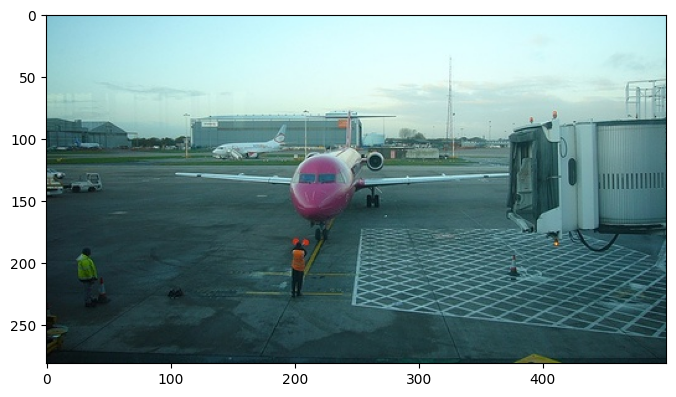

In [1]:
import cv2
import matplotlib.pyplot as plt
import os

default_dir = '../data'
img = cv2.imread(os.path.join(default_dir, 'VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

(1080, 1920, 3)


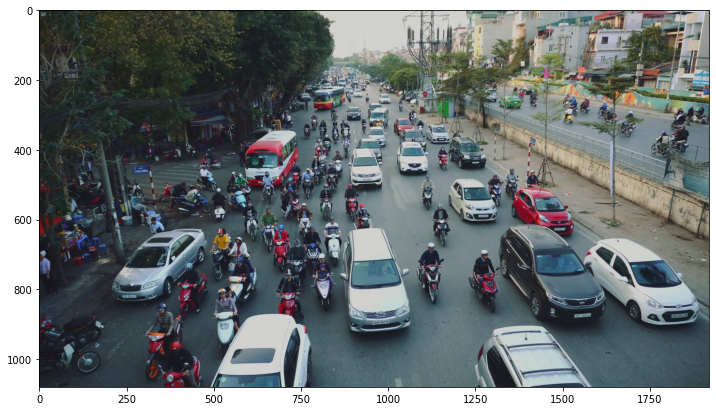

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_array = cv2.cvtColor(cv2.imread('/content/data/img01.png'), cv2.COLOR_BGR2RGB)
print(image_array.shape)

plt.figure(figsize=(12, 12))
plt.imshow(image_array)

In [5]:
!cat {default_dir}/VOCdevkit/VOC2012/Annotations/2007_000032.xml

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000032.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>281</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>aeroplane</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>104</xmin>
			<ymin>78</ymin>
			<xmax>375</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>aeroplane</name>
		<pose>Left</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>133</xmin>
			<ymin>88</ymin>
			<xmax>197</xmax>
			<ymax>123</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>195</xmin>
			<ymin>180</ymin>
			<xmax>213</xmax>
			<ymax>229</ymax>
		</bndbox>
	</object>
	<object>
		<name>p

img shape: (281, 500, 3)


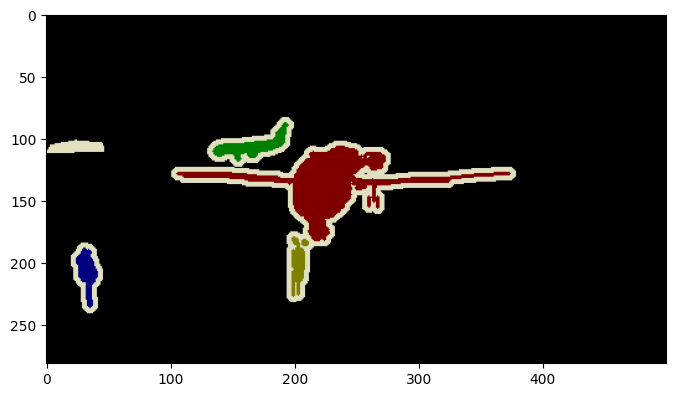

In [34]:
img = cv2.imread(os.path.join(default_dir, 'VOCdevkit/VOC2012/SegmentationObject/2007_000032.png'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [35]:
import random

VOC_ROOT_DIR = '../data/VOCdevkit/VOC2012/'
ANNO_DIR = os.path.join(VOC_ROOT_DIR, 'Annotations')
IMAGE_DIR = os.path.join(VOC_ROOT_DIR, 'JPEGIMAGES')

xml_files = os.listdir(ANNO_DIR)
print(len(xml_files))
print(xml_files[:5])

17125
['2011_006135.xml', '2008_006482.xml', '2010_005054.xml', '2010_005732.xml', '2011_004044.xml']


In [36]:
import os
import xml.etree.ElementTree as ET

xml_file = os.path.join(ANNO_DIR, '2007_000032.xml')

tree = ET.parse(xml_file)
root = tree.getroot()

image_name = root.find('filename').text
full_image_name = os.path.join(IMAGE_DIR, image_name)
image_size = root.find('size')
image_width = int(image_size.find('width').text)
image_height = int(image_size.find('height').text)

object_list = []
for obj in root.findall('object'):  
  xmlbox = obj.find('bndbox')
  x1 = int(xmlbox.find('xmin').text)
  y1 = int(xmlbox.find('ymin').text)
  x2 = int(xmlbox.find('xmax').text)
  y2 = int(xmlbox.find('ymax').text)

  bndbox_pos = (x1, y1, x2, y2)

  class_name = obj.find('name').text
  object_dict = {'class_name': class_name, 'bndbox_pos': bndbox_pos}
  object_list.append(object_dict)

print('full_image_name:', full_image_name)
print('image_size:', (image_width, image_height))

for object in object_list:
  print(object)

full_image_name: ../data/VOCdevkit/VOC2012/JPEGIMAGES/2007_000032.jpg
image_size: (500, 281)
{'class_name': 'aeroplane', 'bndbox_pos': (104, 78, 375, 183)}
{'class_name': 'aeroplane', 'bndbox_pos': (133, 88, 197, 123)}
{'class_name': 'person', 'bndbox_pos': (195, 180, 213, 229)}
{'class_name': 'person', 'bndbox_pos': (26, 189, 44, 238)}


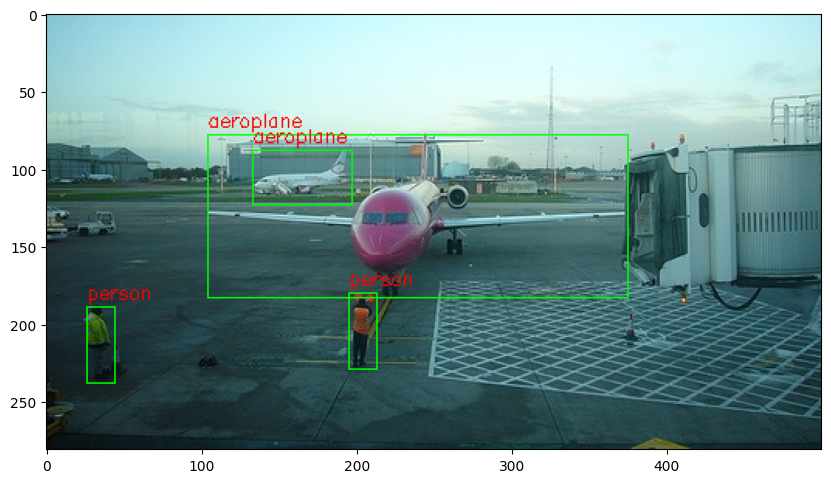

In [33]:
xml_file = os.path.join(ANNO_DIR, '2007_000032.xml')

tree = ET.parse(xml_file)
root = tree.getroot()

image_name = root.find('filename').text
full_image_name = os.path.join(IMAGE_DIR, image_name)

img = cv2.imread(full_image_name)
draw_img = img.copy()

green_color = (0, 255, 0)
red_color = (0, 0, 255)

for obj in root.findall('object'):
  xmlbox = obj.find('bndbox')
  left = int(xmlbox.find('xmin').text)
  top = int(xmlbox.find('ymin').text)
  right = int(xmlbox.find('xmax').text)
  bottom = int(xmlbox.find('ymax').text)

  class_name = obj.find('name').text

  cv2.rectangle(draw_img, (left, top), (right, bottom), color=green_color, thickness=1)
  cv2.putText(draw_img, class_name, (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, thickness=1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)